In [26]:
# Load the trained model
# Provide a way to test a single image
# Provide a way to test an entire scan, every slice
# Provide a way to test a partial scan (below a certain slice)

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import glob
import os
from tf_unet import unet
from tf_unet.image_util import ImageDataProvider
from PIL import Image
from natsort import natsorted

modelPath = './unet_trained/model.ckpt'
plt.rcParams['image.cmap'] = 'gray'
np.random.seed(98765)

class GrayImageDataProvider(ImageDataProvider):
    def __init__(self, search_path, a_min=None, a_max=None, data_suffix=".png", mask_suffix='.png', shuffle_data=False, augment_data=False):
        self.augment_data = augment_data
        super(GrayImageDataProvider, self).__init__(search_path, a_min, a_max, data_suffix, mask_suffix, shuffle_data)

    def _load_file(self, path, dtype=np.float32):
        im = Image.open(path).convert('L')
        return np.array(im, dtype)
    
    def _post_process(self, data, labels):
        if (self.augment_data):
            data_aug, labels_aug = do_augment_data(data, labels)
        else:
            data_aug, labels_aug = data, labels
        return data_aug, labels_aug;

class SingleImageDataProvider(GrayImageDataProvider):
    def __init__(self, search_path):
        super(SingleImageDataProvider, self).__init__(search_path, a_min=None, a_max=None, data_suffix='.png', mask_suffix='.png', shuffle_data=False, augment_data=False)

    def _find_data_files(self, search_path):
        all_files = glob.glob(search_path)
        return [name for name in all_files]

class FolderDataProvider(GrayImageDataProvider):
    def __init__(self, search_path):
        super(FolderDataProvider, self).__init__(os.path.join(search_path, '*.png'), a_min=None, a_max=None, data_suffix='.png', mask_suffix='.png', shuffle_data=False, augment_data=False)

    def _find_data_files(self, search_path):
        all_files = glob.glob(search_path)
        return natsorted([name for name in all_files])
    
    


In [ ]:
# Test a single image

filePath = '../_data/png/26/26_285.png'

# data generator
testGenerator = SingleImageDataProvider(filePath)
x_test, y_test = testGenerator(1)

# load neural network
testNet = unet.Unet(channels=testGenerator.channels, n_class=testGenerator.n_class, layers=3, features_root=32)

# run prediction
prediction = testNet.predict(modelPath, x_test)
mask = prediction[0,...,1] > 0.1
mask = np.pad(mask, (20,20), 'constant', constant_values=(0, 0))

# graph it
fig, ax = plt.subplots(1,2, sharex=True, sharey=True, figsize=(8,4))
ax[0].imshow(x_test[0,...,0], aspect='auto')
ax[1].imshow(mask, aspect='auto')

2019-07-29 21:04:46,209 Layers 3, features 32, filter size 3x3, pool size: 2x2


Number of files used: 304
Number of channels: 1
Number of classes: 2
INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:04:50,247 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:04:50,316 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:04:52,040 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:04:52,128 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:04:53,749 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:04:53,813 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:04:55,406 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:04:55,478 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:04:56,985 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:04:57,052 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:04:58,733 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:04:58,818 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:05:00,607 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:05:00,698 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:05:02,522 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:05:02,617 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:05:04,603 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:05:04,677 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:05:06,212 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:05:06,285 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:05:07,774 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:05:07,869 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:05:09,453 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:05:09,529 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:05:11,337 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:05:11,425 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:05:13,147 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:05:13,226 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:05:14,992 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:05:15,075 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:05:16,794 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:05:16,894 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:05:18,649 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:05:18,731 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:05:20,515 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:05:20,621 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:05:22,956 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:05:23,069 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:05:24,811 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:05:24,896 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:05:26,352 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:05:26,464 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
2019-07-29 21:05:28,011 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:05:28,113 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:05:29,623 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:05:29,706 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:05:31,116 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:05:31,220 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:05:32,760 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:05:32,844 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:05:34,500 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:05:34,588 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:05:36,266 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:05:36,351 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:05:37,974 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:05:38,063 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:05:39,685 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:05:39,780 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:05:41,439 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:05:41,579 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:05:43,149 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:05:43,241 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:05:44,689 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:05:44,789 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:05:46,394 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:05:46,521 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:05:47,923 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:05:48,059 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:05:49,622 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:05:49,716 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:05:51,226 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:05:51,327 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:05:52,934 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:05:53,063 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:05:54,700 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:05:54,798 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:05:56,366 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:05:56,471 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:05:58,058 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:05:58,173 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:05:59,677 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:05:59,786 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:06:01,419 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:06:01,527 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:06:03,121 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:06:03,227 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:06:04,782 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:06:04,889 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:06:06,474 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:06:06,591 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:06:08,203 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:06:08,331 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:06:10,015 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:06:10,130 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:06:11,781 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:06:11,891 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:06:13,553 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:06:13,673 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:06:15,190 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:06:15,314 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:06:16,761 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:06:16,872 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:06:18,371 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:06:18,498 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:06:19,966 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:06:20,090 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:06:21,650 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:06:21,766 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:06:23,336 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:06:23,467 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:06:25,267 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:06:25,414 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:06:27,039 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:06:27,164 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:06:28,767 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:06:28,891 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:06:30,437 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:06:30,566 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:06:32,082 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:06:32,207 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:06:33,727 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:06:33,852 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:06:35,320 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:06:35,450 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:06:36,964 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:06:37,147 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:06:38,753 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:06:38,877 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:06:40,448 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:06:40,583 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:06:42,140 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:06:42,271 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:06:43,838 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:06:43,969 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:06:45,482 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:06:45,615 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:06:47,139 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:06:47,277 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:06:48,804 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:06:48,941 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:06:50,659 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:06:50,896 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:06:52,458 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:06:52,608 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:06:54,164 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:06:54,309 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:06:55,888 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:06:56,029 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:06:57,544 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:06:57,682 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:06:59,073 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:06:59,215 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:07:00,891 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:07:01,039 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:07:02,991 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:07:03,184 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:07:04,923 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:07:05,077 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:07:06,633 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:07:06,788 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:07:08,527 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:07:08,672 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:07:10,256 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:07:10,412 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:07:12,293 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:07:12,455 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:07:14,104 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:07:14,262 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:07:15,969 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:07:16,131 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:07:17,886 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:07:18,047 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:07:19,627 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:07:19,795 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:07:21,352 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:07:21,517 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:07:23,084 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:07:23,248 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:07:24,800 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:07:24,957 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:07:26,617 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:07:26,798 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:07:28,718 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:07:28,887 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:07:30,632 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:07:30,800 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:07:32,518 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:07:32,702 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:07:34,376 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:07:34,600 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:07:36,247 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:07:36,438 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:07:38,137 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:07:38,311 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:07:39,872 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:07:40,039 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:07:41,715 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:07:41,889 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:07:43,633 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:07:43,817 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:07:45,427 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:07:45,614 Model restored from file: ./unet_trained/model.ckpt


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-07-29 21:07:47,224 Restoring parameters from ./unet_trained/model.ckpt
2019-07-29 21:07:47,399 Model restored from file: ./unet_trained/model.ckpt


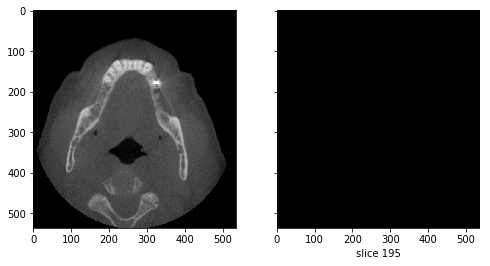

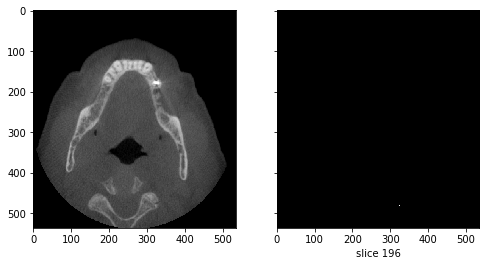

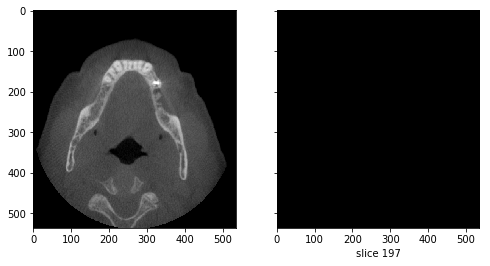

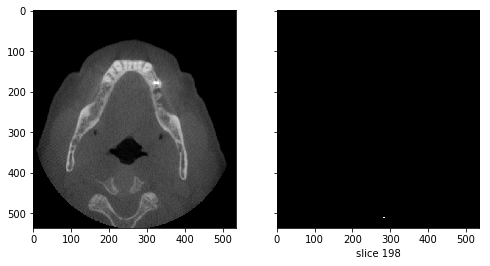

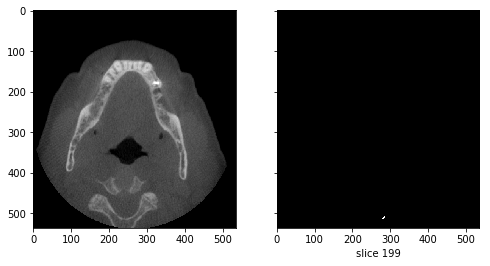

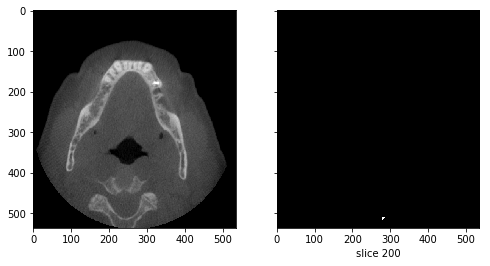

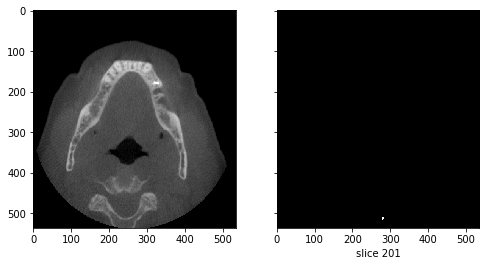

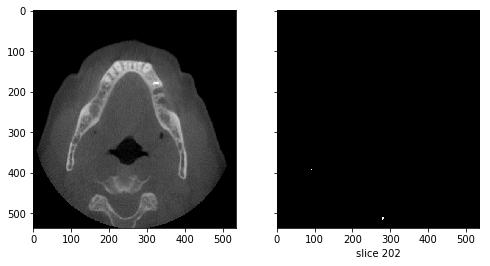

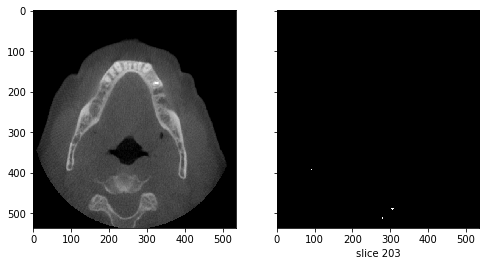

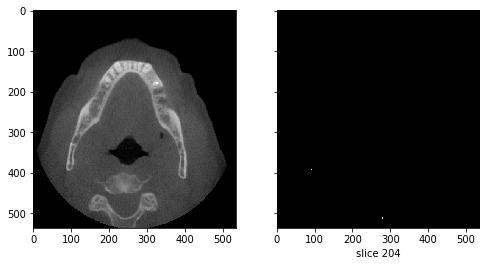

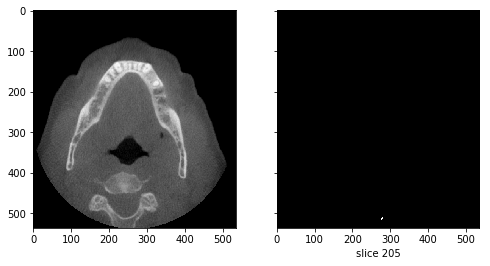

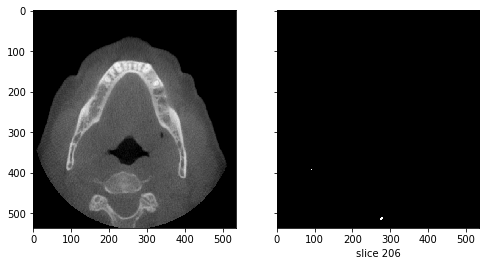

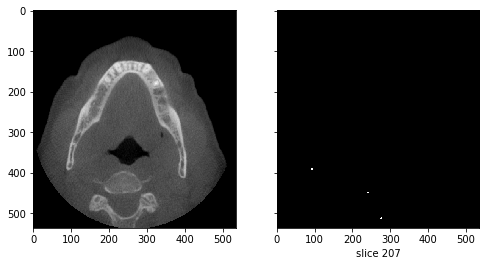

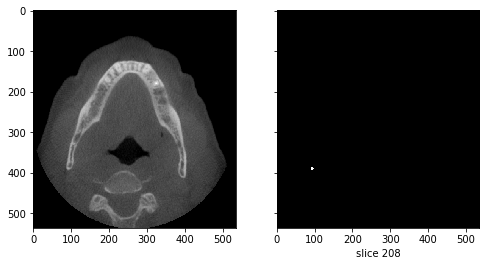

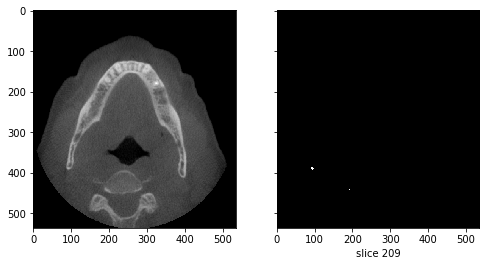

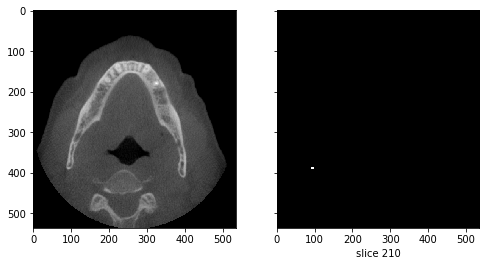

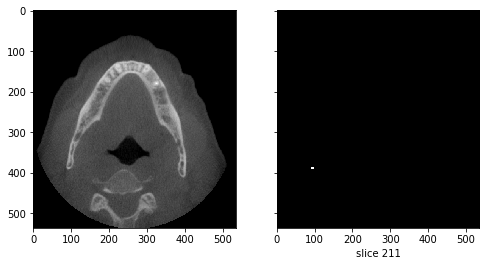

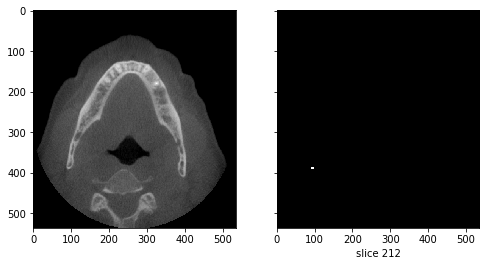

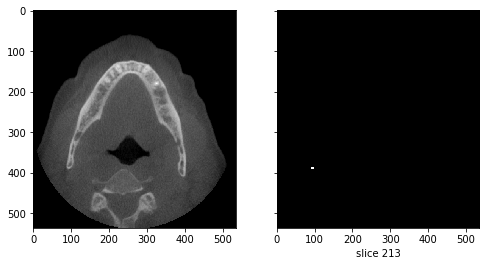

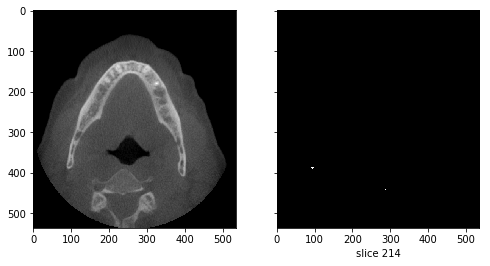

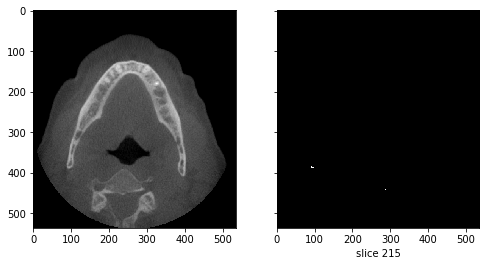

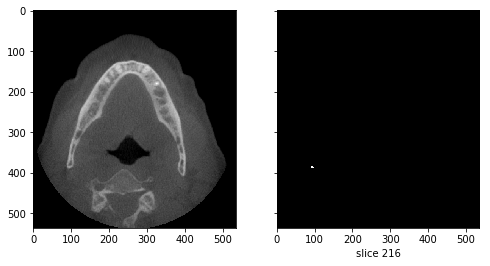

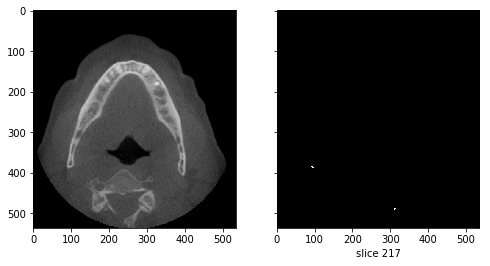

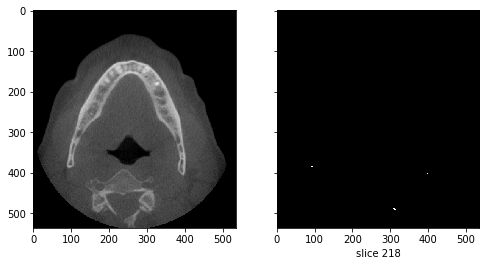

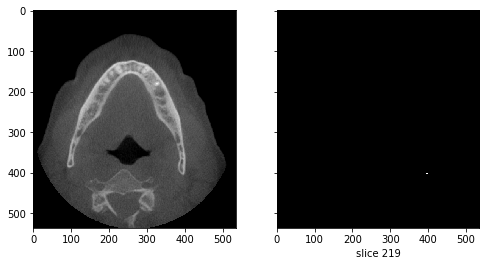

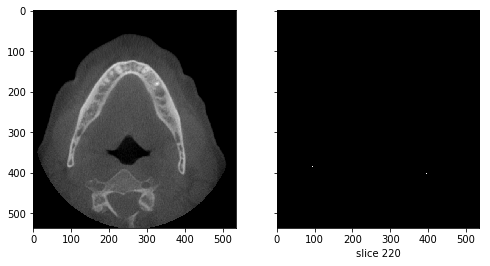

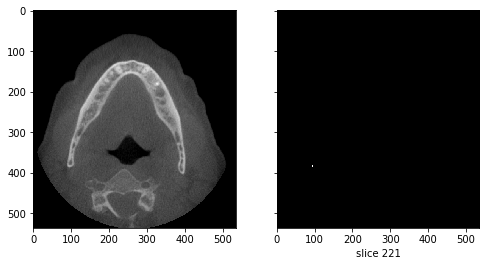

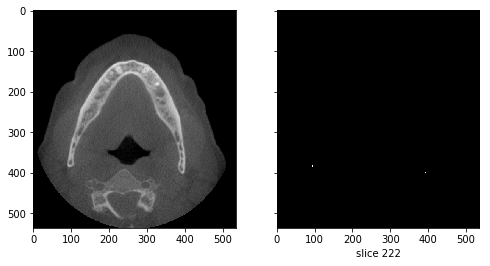

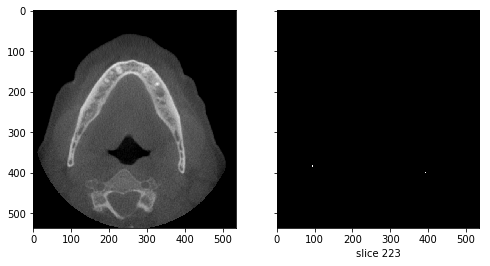

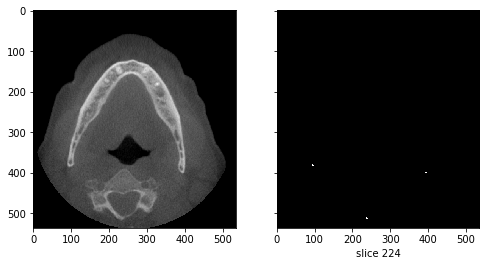

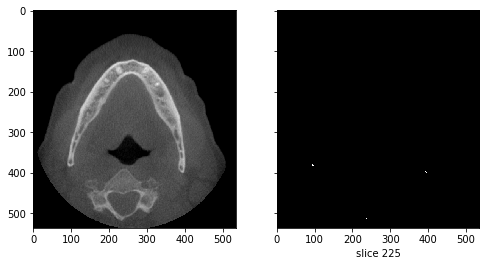

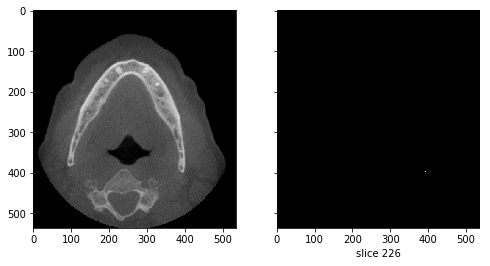

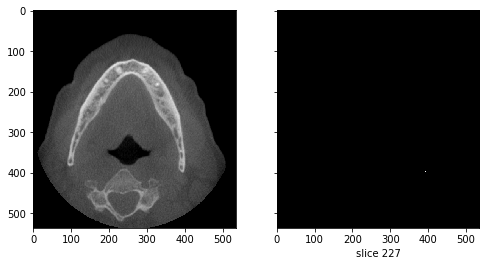

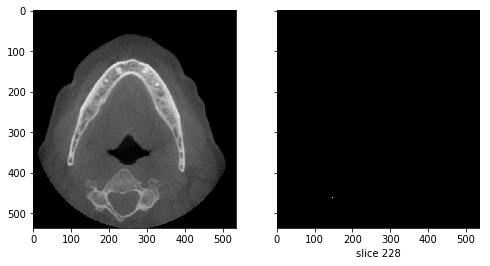

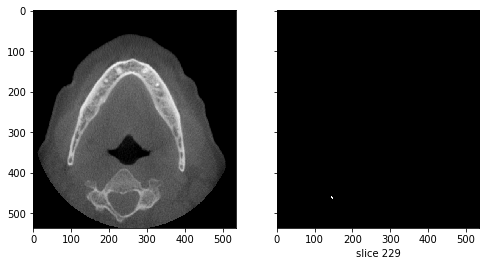

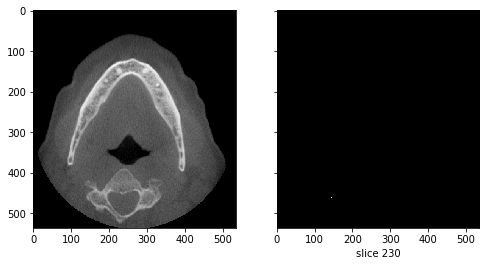

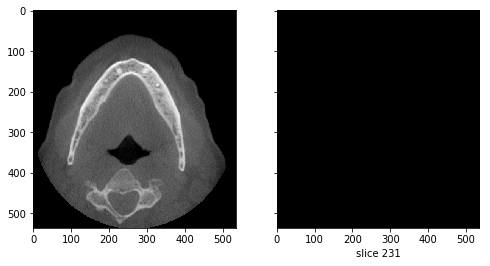

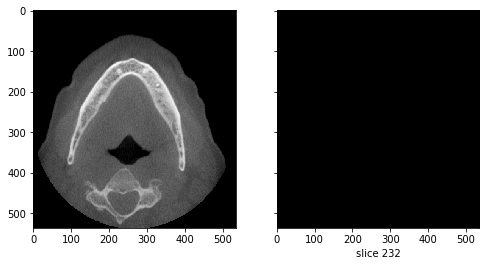

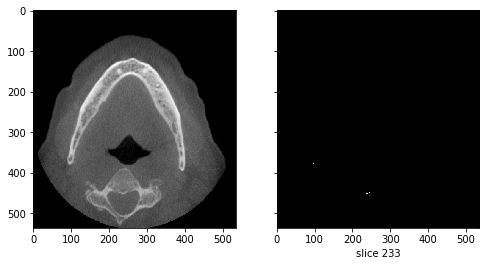

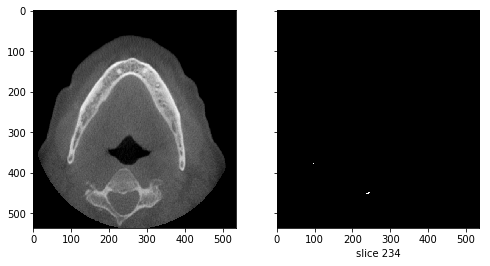

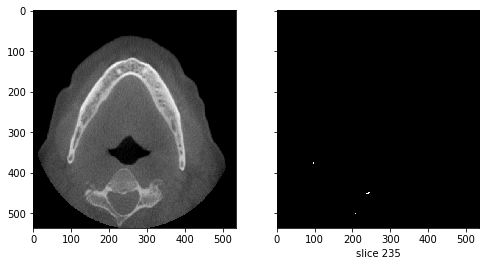

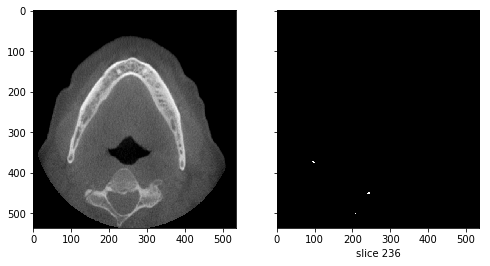

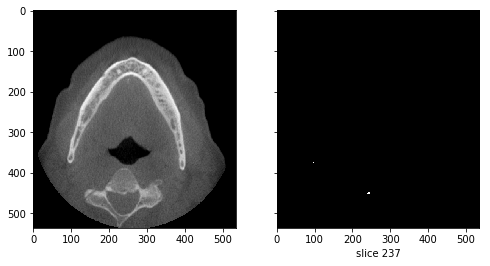

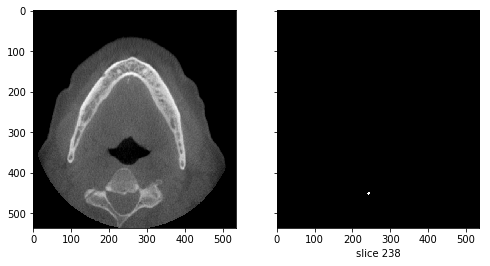

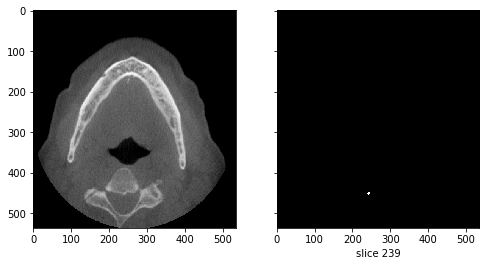

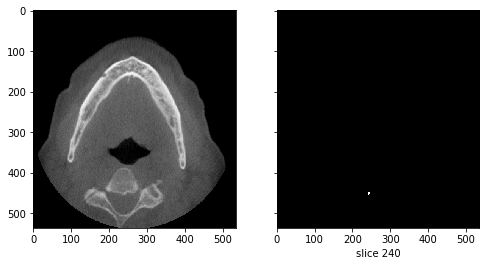

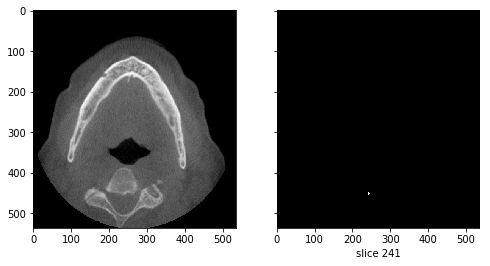

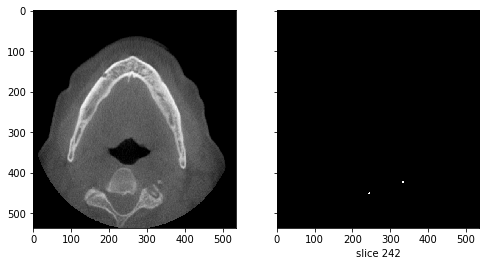

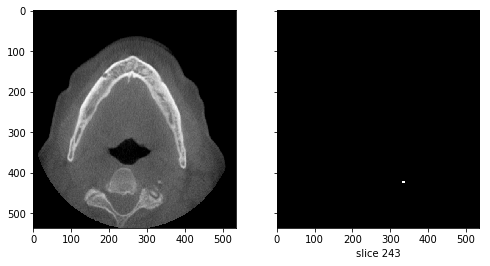

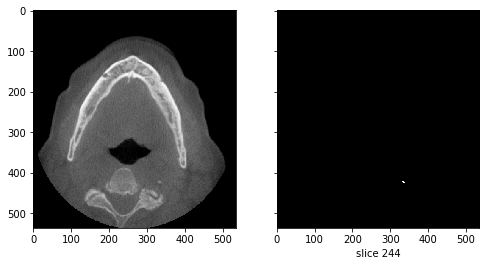

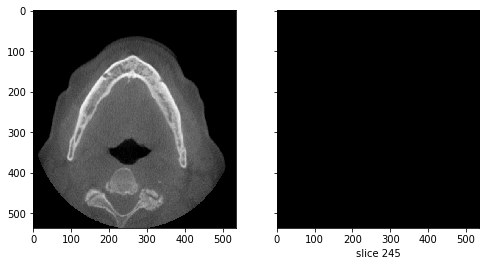

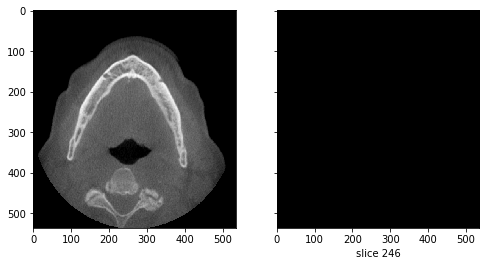

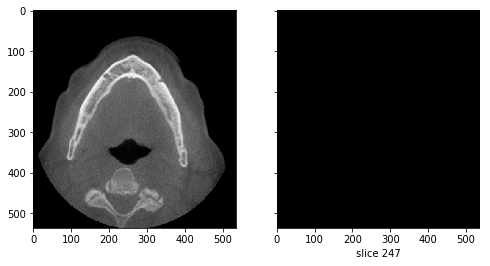

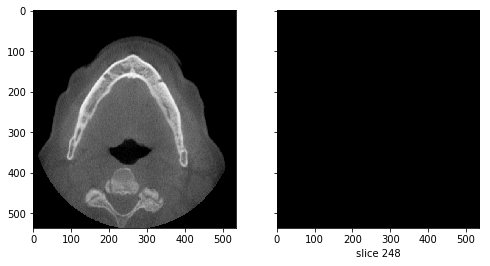

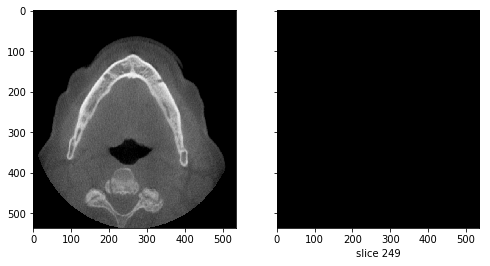

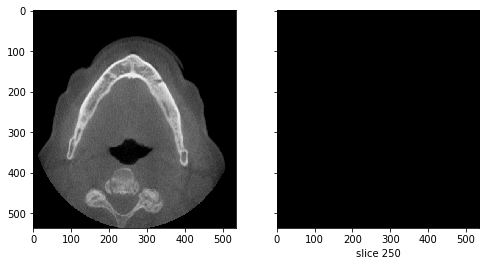

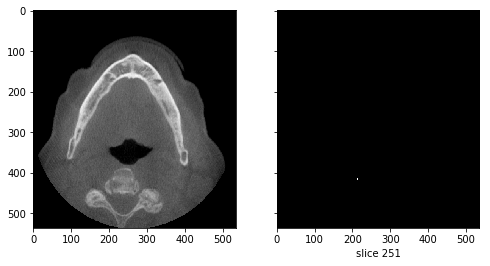

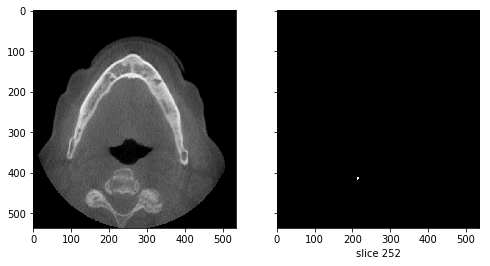

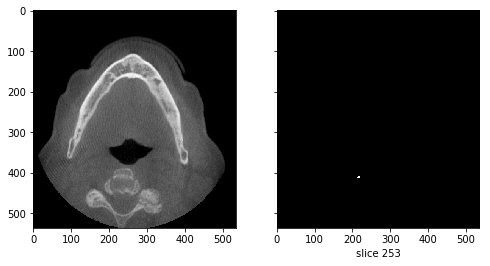

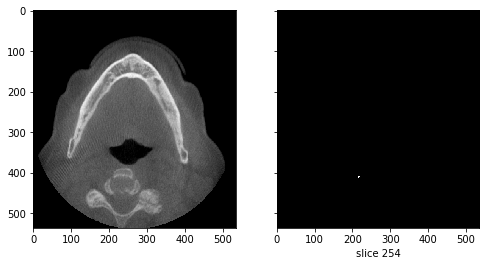

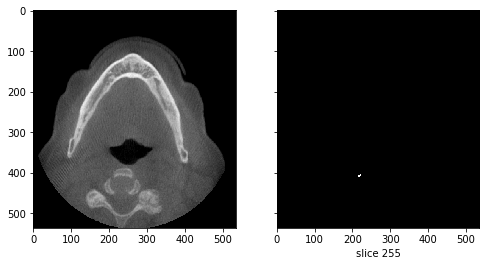

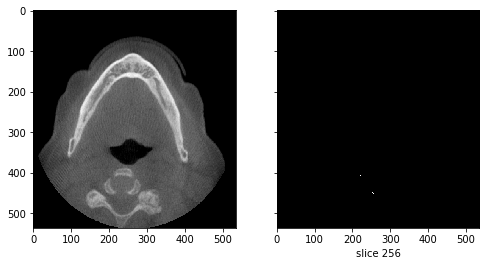

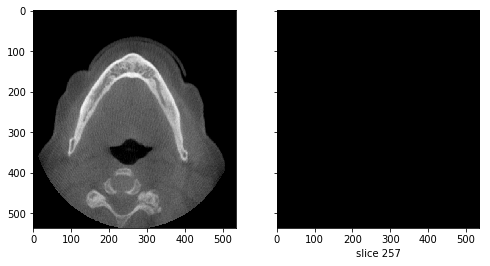

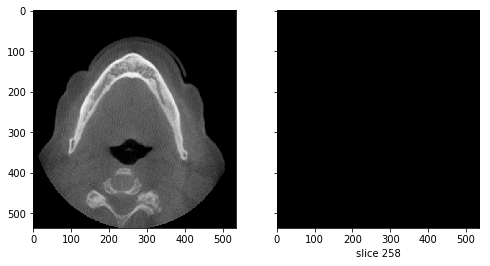

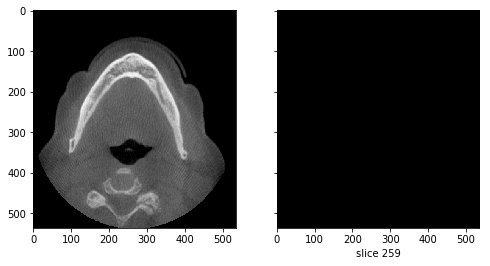

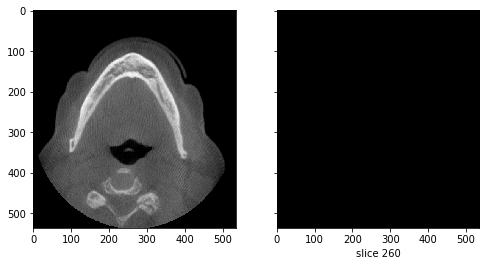

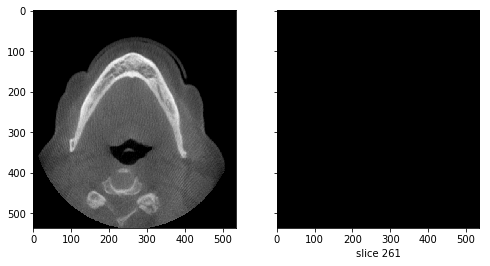

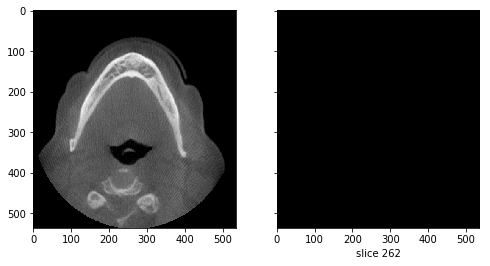

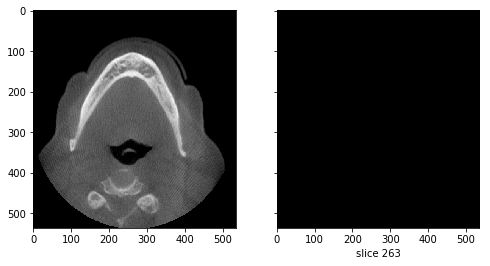

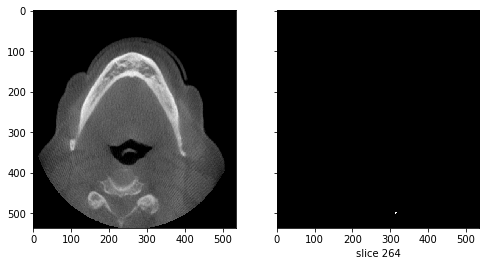

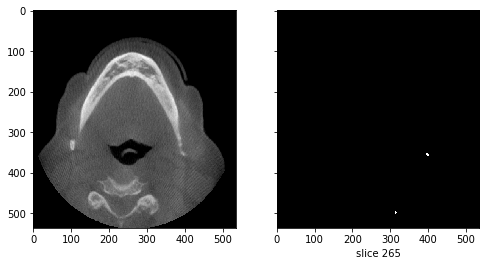

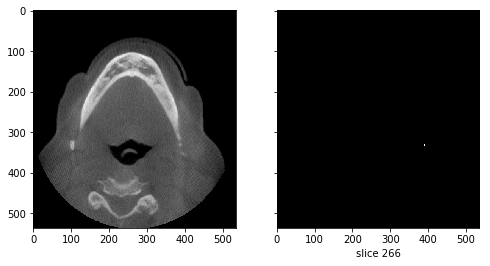

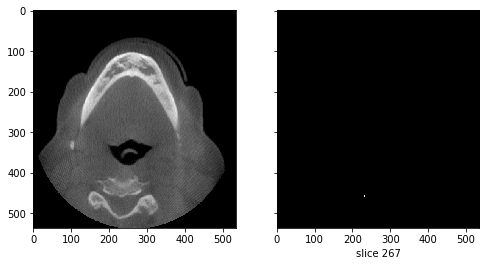

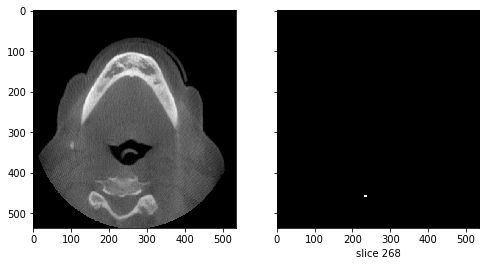

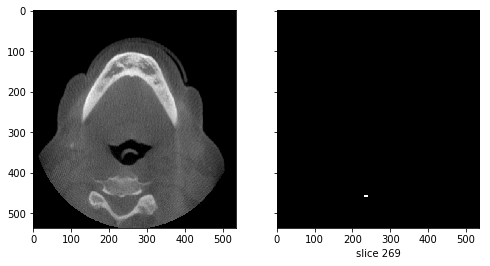

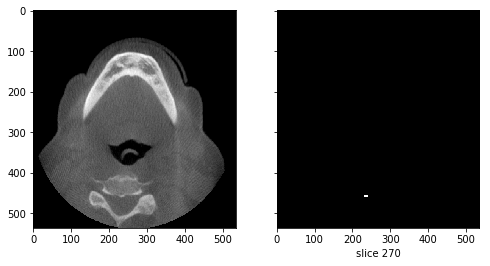

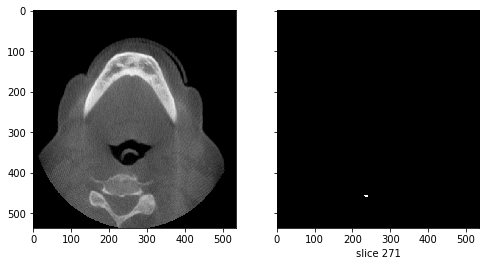

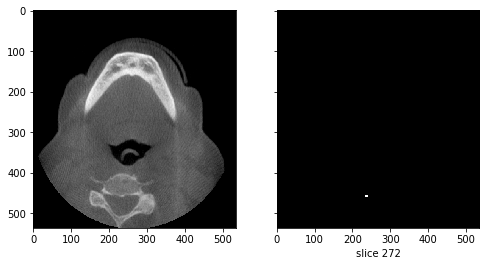

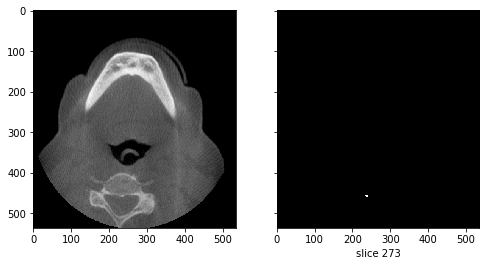

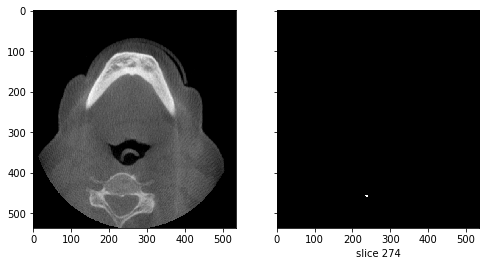

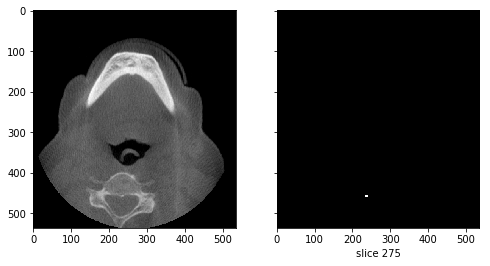

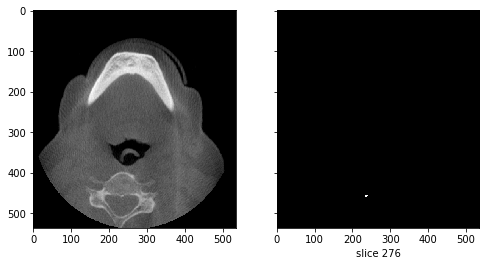

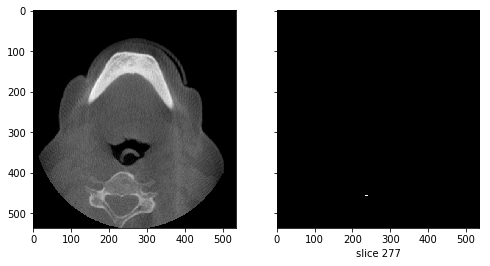

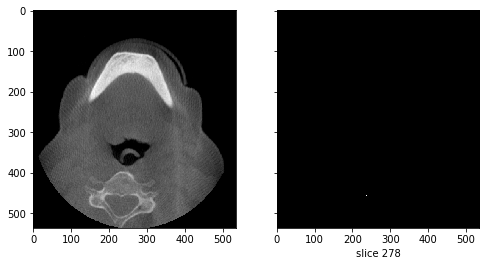

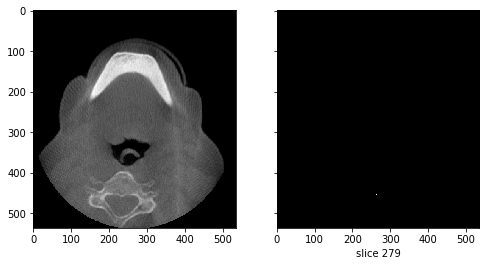

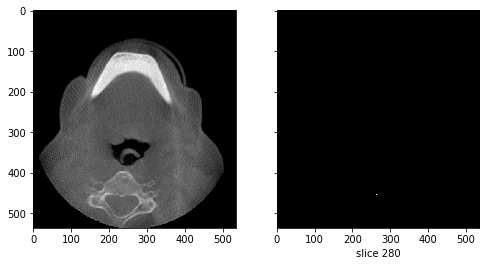

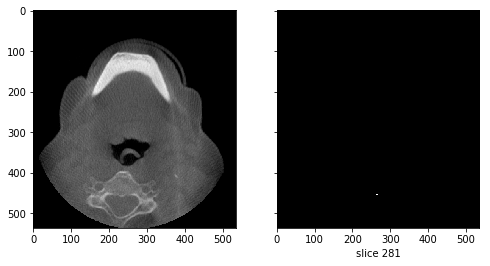

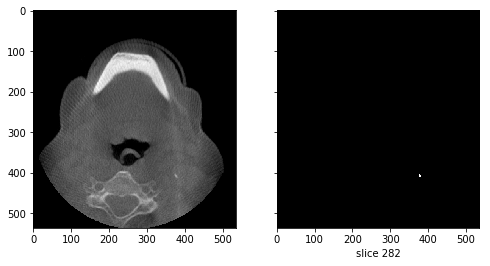

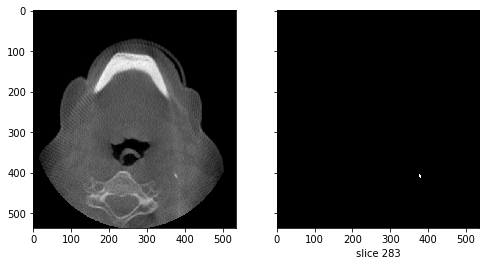

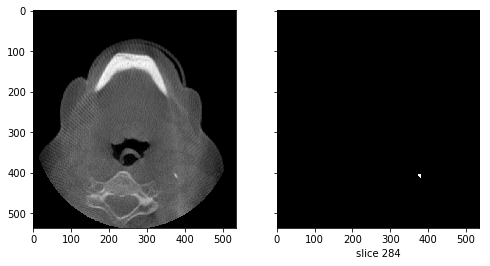

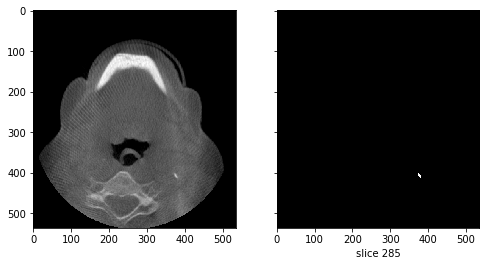

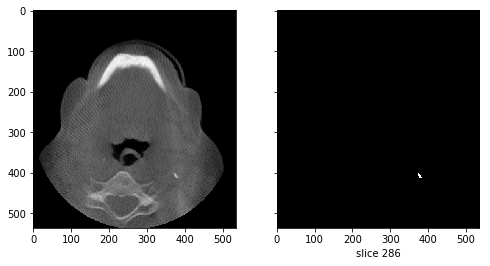

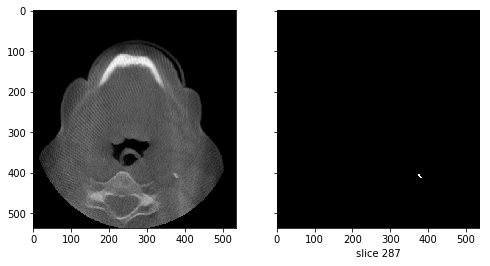

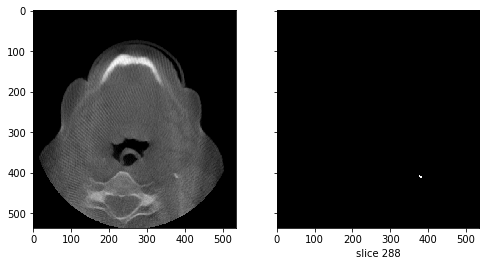

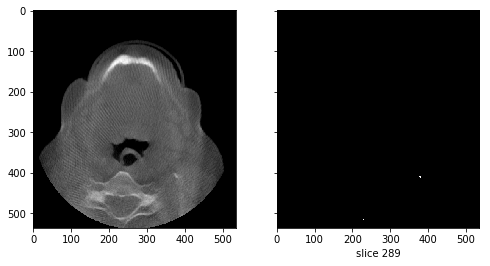

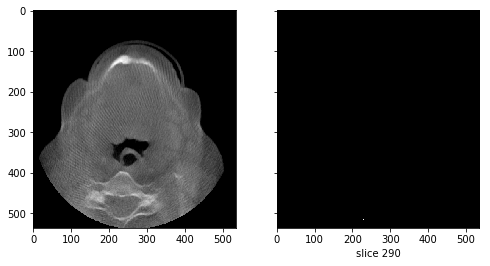

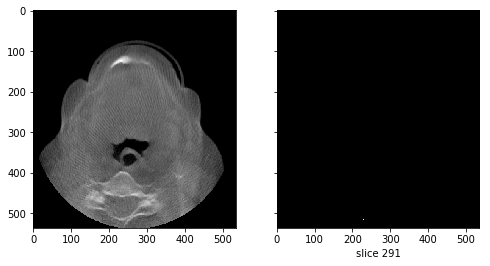

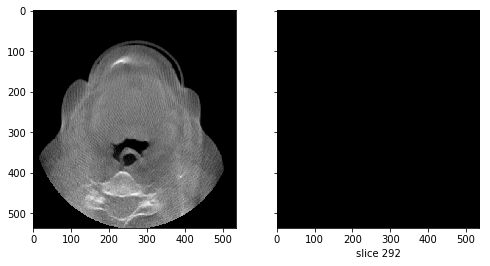

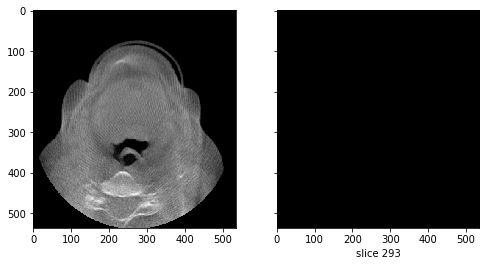

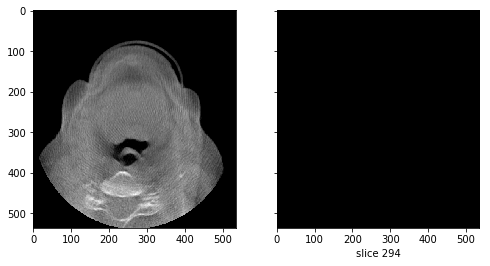

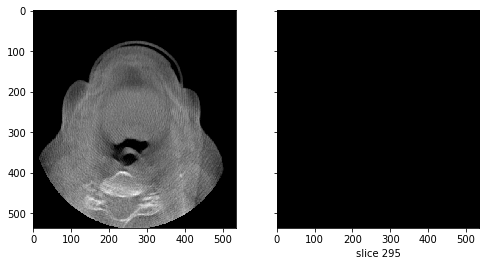

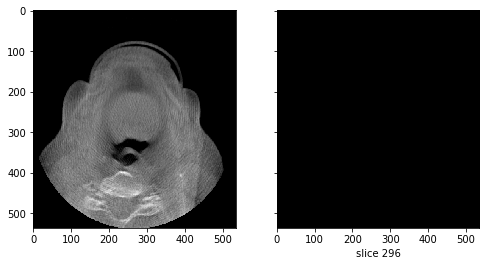

In [34]:
# Test an entire study

folderPath = '../_data/png/35'
startSlice = 195
ignoreMargin = 7

# data generator
testGenerator = FolderDataProvider(folderPath)

# load neural network
testNet = unet.Unet(channels=testGenerator.channels, n_class=testGenerator.n_class, layers=3, features_root=32)

# fast-forward generator to startSlice
testGenerator(startSlice)

for i in range(startSlice, len(testGenerator.data_files) - ignoreMargin):
    # load data
    x_test, y_test = testGenerator(1)
    
    # run prediction
    prediction = testNet.predict(modelPath, x_test)
    mask = prediction[0,...,1] > 0.1
    mask = np.pad(mask, (20,20), 'constant', constant_values=(0, 0))

    # graph it
    fig, ax = plt.subplots(1,2, sharex=True, sharey=True, figsize=(8,4))
    plt.xlabel('slice {}'.format(i))
    ax[0].imshow(x_test[0,...,0], aspect='auto')
    ax[1].imshow(mask, aspect='auto')